In this example we want to interpolate a 1D given function such as 
$$f(x)=e^{-|x|}(\sin(4\pi x)+\cos(2\pi(x-1/4)))$$
below we see a plot of the function.

In [2]:
import numpy as np
def f(x):
    return np.exp(-1*np.abs(x))*(np.sin(x*np.pi*4)+np.cos(x*np.pi*2-np.pi/2))

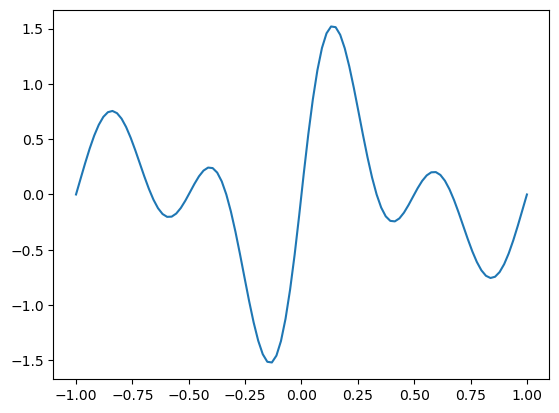

In [3]:
from matplotlib import pyplot as plt

x = np.linspace(-1,1,100)
plt.plot(x,f(x))

First we use the Chebyshev interpolation to check, if the interpolation of functions work correctly:

n: 8 L_infty error: 1.7249280050667153 MSE: 0.5103098564092172
n: 12 L_infty error: 0.8873455025386844 MSE: 0.14220535055586395
n: 16 L_infty error: 0.18043536150771544 MSE: 0.0047799463710195686
n: 20 L_infty error: 0.06074910191575067 MSE: 0.00036609045491840895
n: 100 L_infty error: 0.001433617851734681 MSE: 4.473357526612912e-08


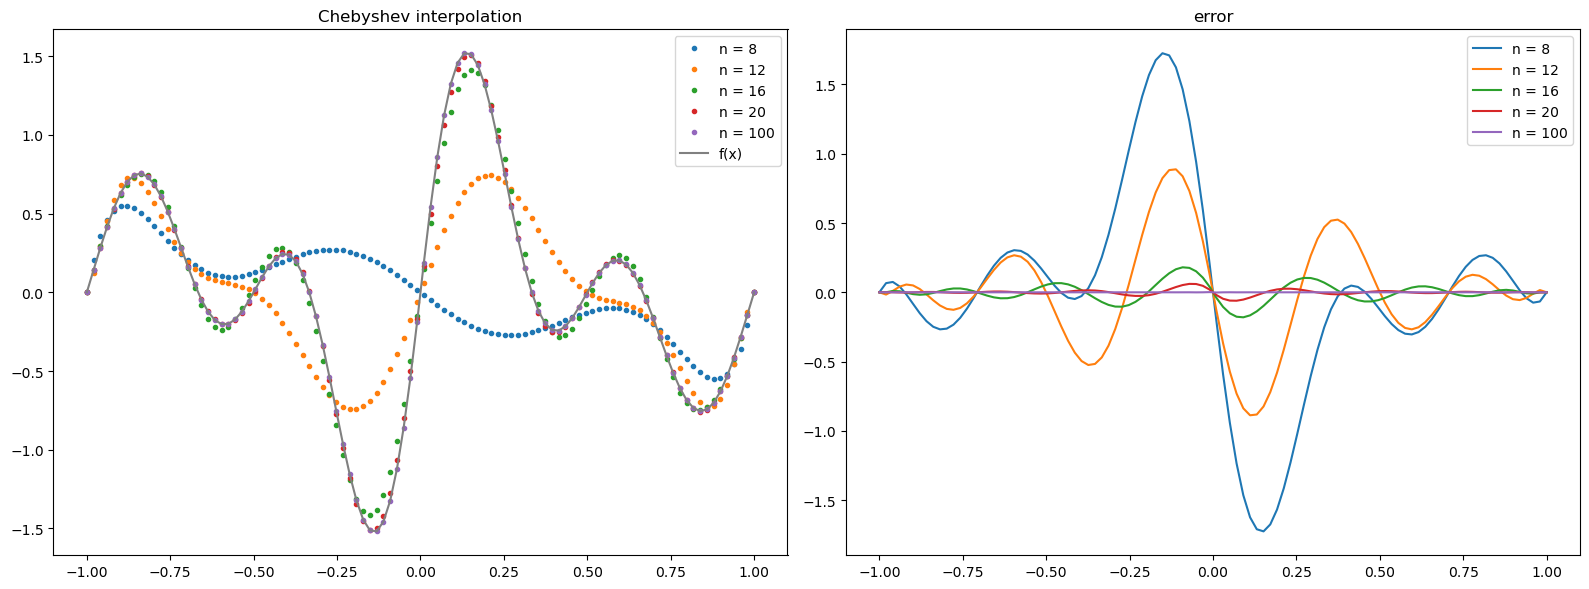

In [4]:
from utils.chebyshev import Chebyshev

x = np.linspace(-1,1,100)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax = ax.ravel()

for n in [8,12,16,20,100]:
    cheb = Chebyshev(f,n,1)
    grid, coefs = cheb.coefficients()
    y = cheb.interpolate(x,coefs)
    ax[0].plot(x,y,'.',label=f"n = {n}")
    ax[1].plot(x,y-f(x),label=f"n = {n}")
    print(f'n: {n} L_infty error: {np.max(np.abs(y-f(x)))} MSE: {np.mean((y-f(x))**2)}')
ax[0].plot(x,f(x),'grey',label='f(x)')
ax[0].set_title('Chebyshev interpolation')
ax[0].legend()
ax[1].set_title('error')
ax[1].legend()
plt.tight_layout()
plt.show()


We see that this function is difficult to be interpolated. Thus $n>20$ is needed to interpolate with an error $<0.1$. 

Iteration: 1 Error: 3.6024431816772395e-07, n: 9, delta: 0.5
Iteration: 2 Error: 2.050222295824078e-07, n: 9, delta: 0.25
Iteration: 3 Error: 9.406612150320015e-08, n: 9, delta: 0.125
Iteration: 4 Error: 3.858601971273856e-08, n: 9, delta: 0.0625
Iteration: 5 Error: 1.0845995823682841e-08, n: 9, delta: 0.03125
Iteration: 6 Error: 4.643685658223262e-09, n: 9, delta: 0.015625
Iteration: 7 Error: 6.157996335076632e-10, n: 9, delta: 0.0078125
Total depth: 138, Total size: 32560, n: 9, delta: 0.015625, error: 6.157996335076632e-10. Reached after 8 iterations.
Error: L_infty error: 1.2768503080194151, MSE: 0.35987814598562456
Iteration: 1 Error: 1.2471744437192456e-07, n: 13, delta: 0.5
Iteration: 2 Error: 5.686960946604813e-08, n: 14, delta: 0.5
Iteration: 3 Error: 1.3737913734379603e-07, n: 14, delta: 0.25
Iteration: 4 Error: 4.534233322139869e-08, n: 14, delta: 0.125
Iteration: 5 Error: 8.391786765482578e-09, n: 14, delta: 0.0625
Iteration: 6 Error: 8.391786765482578e-09, n: 15, delta: 0.

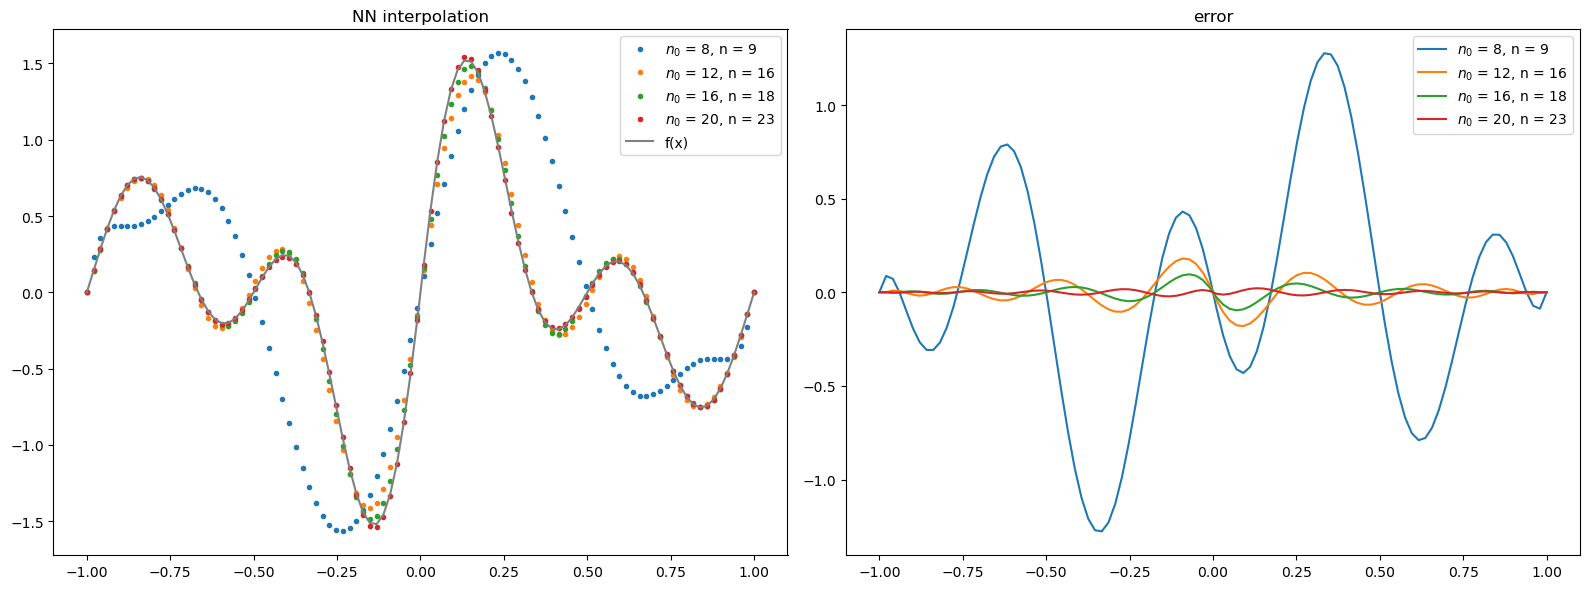

In [8]:
from dnn_construction import compute_dnn

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax = ax.ravel()

for n_0 in [8,12,16,20]:
    net = compute_dnn(1,f,1e-09,0.5,0.5,n_0)
    y_net = np.array([net[0].realize(xi) for xi in x])
    ax[0].plot(x,y_net,'.',label=f"$n_0$ = {n_0}, n = {net[3]}")
    ax[1].plot(x,y_net-f(x),label=f"$n_0$ = {n_0}, n = {net[3]}")
    print(f"Error: L_infty error: {np.max(np.abs(y_net-f(x)))}, MSE: {np.mean((y_net-f(x))**2)}")

ax[0].plot(x,f(x),'grey',label='f(x)')
ax[0].set_title('NN interpolation')
ax[0].legend()
ax[1].set_title('error')
ax[1].legend()
plt.tight_layout()
plt.show()

Here we see that every iteration stops early and the error is small. But the net is constructed for a corrupted interpolation if $n$ is too small. Now we want to show the stepwise beahviour of size and depth.

Iteration: 1 Error: 9.08162434143378e-14, n: 6, delta: 0.5
Total depth: 69, Total size: 9937, n: 5, delta: 0.5, error: 9.08162434143378e-14. Reached after 2 iterations.
Iteration: 1 Error: 5.470512771665881e-07, n: 7, delta: 0.5
Iteration: 2 Error: 3.5954572652485695e-12, n: 8, delta: 0.5
Total depth: 69, Total size: 9991, n: 7, delta: 0.5, error: 3.5954572652485695e-12. Reached after 3 iterations.
Iteration: 1 Error: 3.5954572652485695e-12, n: 8, delta: 0.5
Total depth: 69, Total size: 9991, n: 7, delta: 0.5, error: 3.5954572652485695e-12. Reached after 2 iterations.
Iteration: 1 Error: 3.6024431816772395e-07, n: 9, delta: 0.5
Iteration: 2 Error: 2.050222295824078e-07, n: 9, delta: 0.25
Iteration: 3 Error: 9.406612150320015e-08, n: 9, delta: 0.125
Iteration: 4 Error: 3.858601971273856e-08, n: 9, delta: 0.0625
Iteration: 5 Error: 1.0845995823682841e-08, n: 9, delta: 0.03125
Iteration: 6 Error: 4.643685658223262e-09, n: 9, delta: 0.015625
Iteration: 7 Error: 6.157996335076632e-10, n: 9,

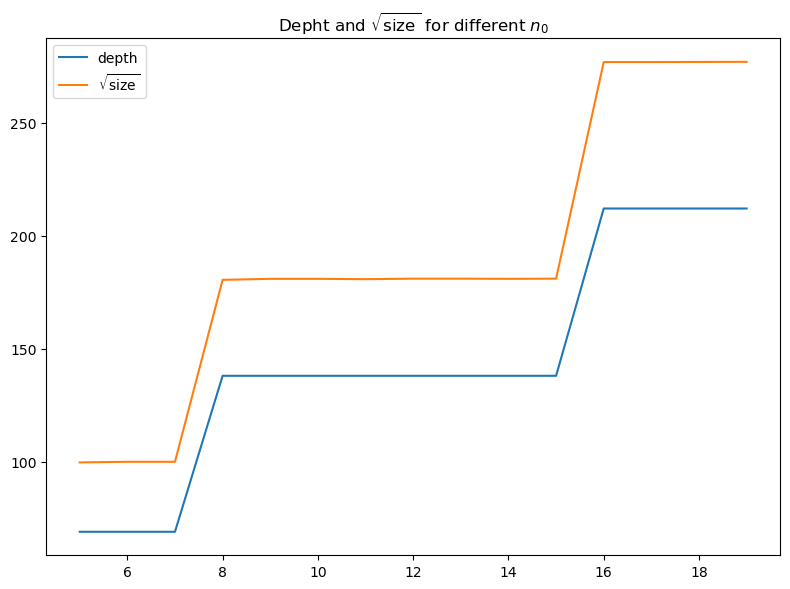

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

x = range(5,20)
depth_net = []
size_net = []
for n_0 in x:
    net = compute_dnn(1,f,1e-09,0.5,0.5,n_0)
    depth_net.append(net[1])
    size_net.append(np.sqrt(net[2]))

plt.plot(x,depth_net,label="depth")
plt.plot(x,size_net,label="$\sqrt{\operatorname{size}}$")
plt.title('Depht and $\sqrt{\operatorname{size}}$ for different $n_0$')
plt.legend()
plt.tight_layout()
plt.show()